In [1]:
# Load packages
import time
from utilities import *

### Remark 5.8. Bounding volatility

- Set objective function to be $g_1(x)+\zeta g_2(x)$ and vary $\xi$ to hit the relative entropy constraint for alternative $\zeta$ with no sign restrictions on $\zeta$.


- Compute 
$$
\log \int \mathbb{E}\left[N_1^*g_1(X_1)\mid \mathfrak{I}_0\right]d Q_0^* - \int \mathbb{E}\left[N_1^*g_2(X_1)\mid \mathfrak{I}_0\right]d Q_0^*
$$
which will depend on $\zeta$.


- Minimize over $\zeta$.


- Perform this for $g_1(X_1)=R_1^w$ and $g_2(X_1)=\log R_1^w$ to compute a lower bound on the proportional risk premium.

In [25]:
# Upper bound
# Count time
time_start = time.time() 

# Use a grid for ζ
ζ_min = -1.02
ζ_max = -1.0
ζ_points = 40
ζ_step = (ζ_max-ζ_min)/ζ_points
ζ_grid = np.arange(ζ_min,ζ_max,ζ_step)
vol_array = np.zeros_like(ζ_grid)

# Do computation for each ζ
for i in range(len(ζ_grid)):
    if i%10 == 0:
        print('--- processing: #%s ---' % i)
    ζ = ζ_grid[i]
    vol_array[i],_,_,_ = volatility(ζ=ζ,x_min_RE=1.2,lower=False,ξ_tol=1e-7)
print('--- finished ---')

# Print out the time spent
time_spent = round(time.time()-time_start,4)
print("Time spent: %s seconds ---" % (time_spent))

--- processing: #0 ---
--- processing: #10 ---
--- processing: #20 ---
--- processing: #30 ---
--- finished ---
Time spent: 322.255 seconds ---


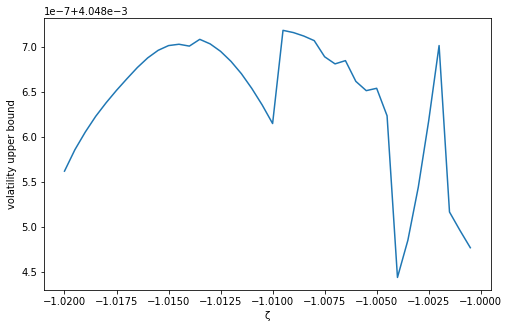

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

plt.plot(ζ_grid,vol_array)
plt.xlabel('ζ')
plt.ylabel('volatility upper bound')
# plt.savefig('vol_plot_20%',dpi=100)
plt.show()

In [27]:
vol_optimal = vol_array.max()
ζ_optimal = ζ_grid[vol_array == vol_optimal][0]
print('Optimal ζ: %s' % np.round(ζ_optimal,4))
print('Upper bound on the proportional risk premium: %s' % vol_optimal)

Optimal ζ: -1.0095
Upper bound on the proportional risk premium: 0.004048718148689378
